<a href="https://colab.research.google.com/github/uniitee/MLSC_SeasonOfAI/blob/main/Art_Gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
karnikakapoor_art_portraits_path = kagglehub.dataset_download('karnikakapoor/art-portraits')

print('Data source import complete.')


# Importing Dependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import tensorflow as tf
%matplotlib inline

# Importing Data

In [ ]:
# Setting the path to the directory containing the images
data_path = "/kaggle/input/art-portraits/Portraits_update/Portraits"

data=tf.keras.preprocessing.image_dataset_from_directory(data_path,label_mode=None,image_size=(64,64),batch_size=32)

Found 6512 files.


# Data PrePracessing

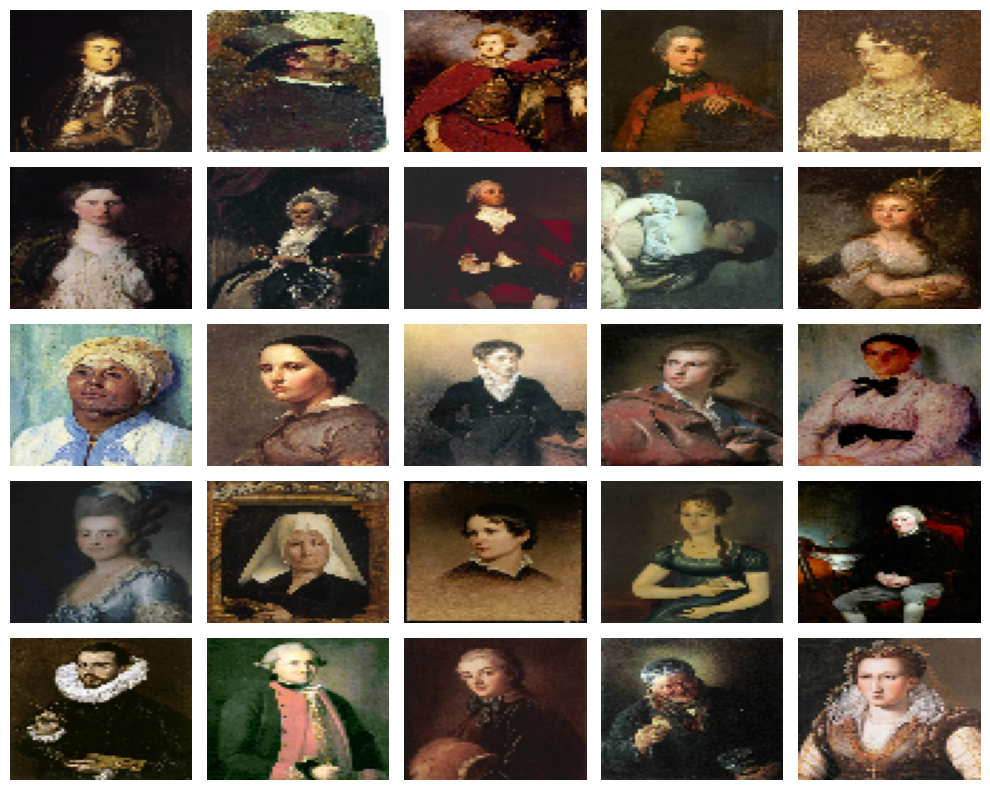

In [ ]:
data = data.map(lambda x: x / 255.0)
images = next(iter(data.take(25)))

plt.figure(figsize=(10,8))
for i in range(25):
    plt.subplot(5,5, i + 1)
    plt.imshow(images[i].numpy())
    plt.axis("off")
    plt.gca().set_aspect('auto')

plt.tight_layout()
plt.show()

# Building a Generator

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Reshape, UpSampling2D, Conv2D, BatchNormalization, Activation, LeakyReLU

latent_dim = 128
# Building a Generator
generator = Sequential()
generator.add(Dense(4 * 4 * 256, activation="relu", input_dim=latent_dim))
generator.add(Reshape((4, 4, 256)))
generator.add(UpSampling2D())
generator.add(Conv2D(256, kernel_size=3, padding="same"))
generator.add(BatchNormalization(momentum=0.8))
generator.add(LeakyReLU(alpha=0.2))

# Adding more upsampling layers
for _ in range(2):  # Increase resolution further
    generator.add(UpSampling2D())
    generator.add(Conv2D(256, kernel_size=3, padding="same"))
    generator.add(BatchNormalization(momentum=0.8))
    generator.add(LeakyReLU(alpha=0.2))

generator.add(UpSampling2D())  # Add this layer at the end to upsample to 64x64
generator.add(Conv2D(3, kernel_size=3, padding="same"))
generator.add(Activation("tanh"))
# Final layers
generator.add(Conv2D(128, kernel_size=3, padding="same"))
generator.add(BatchNormalization(momentum=0.8))
generator.add(LeakyReLU(alpha=0.2))
generator.add(Conv2D(3, kernel_size=3, padding="same"))
generator.add(Activation("tanh"))

generator.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4096)           │       528,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 64, 64, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 3)      │         6,915 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 3)      │         3,459 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64, 64, 3)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,316,166 (8.84 MB)

 Trainable params: 2,314,374 (8.83 MB)

 Non-trainable params: 1,792 (7.00 KB)

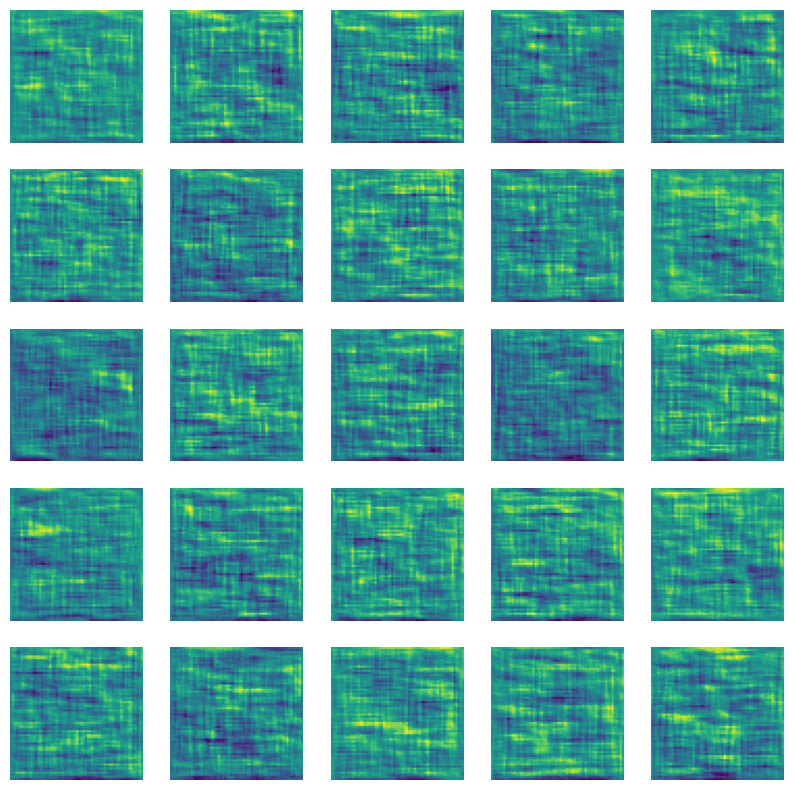

In [ ]:
#Creating a random seed and output from generator
num_images = 25
random_vectors = tf.random.normal([num_images, latent_dim])
generated_images = generator(random_vectors, training=False)

plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(5, 5, i + 1)
    plt.imshow(generated_images[i, :, :, 0])
    plt.axis("off")
plt.show()

# Building a Discriminator

In [ ]:
from keras.layers import Conv2D, LeakyReLU, Dropout, ZeroPadding2D, BatchNormalization, Flatten, Dense
discriminator = Sequential()
discriminator.add(Conv2D(32, kernel_size=3, strides=2, input_shape=(64,64,3), padding="same"))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
discriminator.add(ZeroPadding2D(padding=((0,1),(0,1))))
discriminator.add(BatchNormalization(momentum=0.7))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
discriminator.add(BatchNormalization(momentum=0.7))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
discriminator.add(BatchNormalization(momentum=0.7))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(512, kernel_size=3, strides=1, padding="same"))
discriminator.add(BatchNormalization(momentum=0.7))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation="sigmoid"))

discriminator.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d (ZeroPadding2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 17, 17, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 9, 9, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 9, 9, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 9, 9, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 9, 9, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 9, 9, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        41,473 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,613,889 (6.16 MB)

 Trainable params: 1,611,969 (6.15 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
#for the random image generated
result = discriminator(generated_images)
print (result)

tf.Tensor(
[[0.4998934 ]
 [0.49975228]
 [0.49994814]
 [0.49972948]
 [0.49982852]
 [0.4999962 ]
 [0.49985245]
 [0.4999864 ]
 [0.49988702]
 [0.49970025]
 [0.49989632]
 [0.4999194 ]
 [0.49965423]
 [0.49974275]
 [0.4998667 ]
 [0.4999018 ]
 [0.49981815]
 [0.4996867 ]
 [0.49975508]
 [0.5000277 ]
 [0.49971306]
 [0.49981278]
 [0.5001013 ]
 [0.50004244]
 [0.5000029 ]], shape=(25, 1), dtype=float32)


# Gan Training

In [ ]:
class GAN(tf.keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super().__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.seed_generator = tf.keras.random.SeedGenerator(1440)

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super().compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = tf.keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = tf.keras.metrics.Mean(name="g_loss")

    @property

    def metrics(self):
        return [self.d_loss_metric,self.g_loss_metric]

    def train_step(self,real_image):
        batch_size=tf.shape(real_image)[0]
        random_vector=tf.random.normal(shape=(batch_size,self.latent_dim))

        generated_images=self.generator(random_vector)
        combined_images=tf.concat([generated_images,real_image],axis=0)
        labels=tf.concat([tf.ones((batch_size,1)),tf.zeros((batch_size,1))],axis=0)
        labels+=0.05*tf.random.uniform(tf.shape(labels))

        with tf.GradientTape() as tape:
            predictions=self.discriminator(combined_images)
            d_loss=self.loss_fn(labels,predictions)
        grads=tape.gradient(d_loss,self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(zip(grads,self.discriminator.trainable_weights))

        random_latent_vectors=tf.random.normal(shape=(batch_size,self.latent_dim))

        misleading_labels=tf.zeros((batch_size,1))


        with tf.GradientTape() as tape:
            predictions=self.discriminator(self.generator(random_latent_vectors))
            g_loss=self.loss_fn(misleading_labels,predictions)
        grads=tape.gradient(g_loss,self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads,self.generator.trainable_weights))

        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {"d_loss": self.d_loss_metric.result(), "g_loss": self.g_loss_metric.result()}


In [ ]:
class ImageGeneratorCallback(tf.keras.callbacks.Callback):
    def __init__(self, latent_dim):
        super(ImageGeneratorCallback, self).__init__()
        self.latent_dim = latent_dim
        self.generated_images = []

    def on_epoch_end(self, epoch, logs=None):
        generated_images = self.model.generator(tf.random.normal(shape=(36, self.latent_dim)))
        self.generated_images.append(generated_images)
        if (epoch + 1) % 20 == 0 or (epoch + 1) == epochs:
            fig, ax = plt.subplots(6, 6, figsize=(8, 8))
            for i in range(6):
                for j in range(6):
                    ax[i, j].imshow(generated_images[i * 6 + j])
                    ax[i, j].axis("off")
            plt.suptitle(f"Epoch {epoch + 1}/{epochs} - D Loss: {logs['d_loss']:.4f}, G Loss: {logs['g_loss']:.4f}")
            plt.show()

# Training model

Epoch 1/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 37s 134ms/step - d_loss: 0.6453 - g_loss: 0.9362
Epoch 2/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 114ms/step - d_loss: 0.6497 - g_loss: 1.0296
Epoch 3/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 110ms/step - d_loss: 0.6598 - g_loss: 0.9239
Epoch 4/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 42s 113ms/step - d_loss: 0.6657 - g_loss: 0.8656
Epoch 5/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 113ms/step - d_loss: 0.6571 - g_loss: 0.9209
Epoch 6/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 24s 115ms/step - d_loss: 0.6331 - g_loss: 0.9883
Epoch 7/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 113ms/step - d_loss: 0.6349 - g_loss: 1.0096
Epoch 8/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 111ms/step - d_loss: 0.6240 - g_loss: 1.0326
Epoch 9/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 111ms/step - d_loss: 0.6298 - g_loss: 1.0065
Epoch 10/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 42s 112ms/step - d_loss: 0.6289 - g_loss: 1.0146
Epoch 11/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 109ms/step - d_loss: 0.6308 - g_loss: 1.0207
Epoch 12

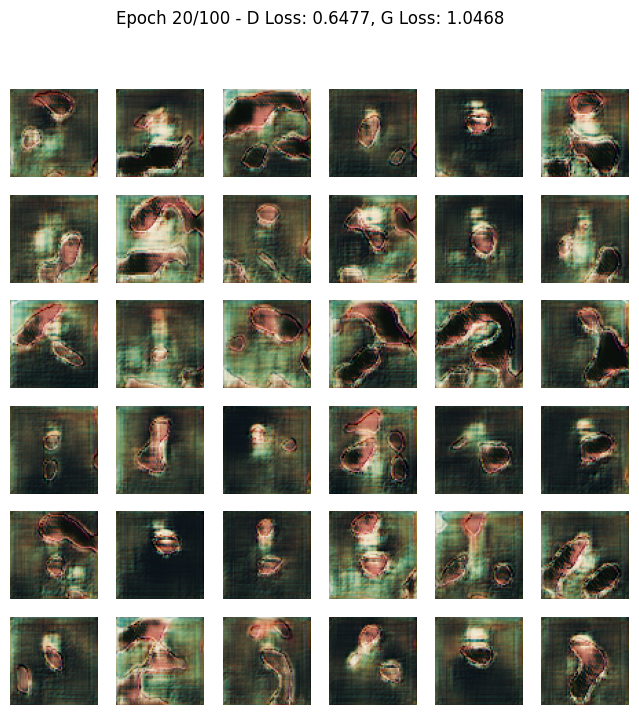

204/204 ━━━━━━━━━━━━━━━━━━━━ 24s 120ms/step - d_loss: 0.6503 - g_loss: 1.0622
Epoch 21/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 40s 113ms/step - d_loss: 0.6237 - g_loss: 1.0899
Epoch 22/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 113ms/step - d_loss: 0.6231 - g_loss: 1.0736
Epoch 23/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 111ms/step - d_loss: 0.6265 - g_loss: 1.1069
Epoch 24/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 113ms/step - d_loss: 0.6277 - g_loss: 1.0749
Epoch 25/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 114ms/step - d_loss: 0.6041 - g_loss: 1.1980
Epoch 26/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 112ms/step - d_loss: 0.6331 - g_loss: 1.1020
Epoch 27/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 41s 114ms/step - d_loss: 0.6187 - g_loss: 1.1535
Epoch 28/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 110ms/step - d_loss: 0.6205 - g_loss: 1.1549
Epoch 29/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 41s 113ms/step - d_loss: 0.6114 - g_loss: 1.1805
Epoch 30/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 111ms/step - d_loss: 0.6186 - g_loss: 1.0944
Epoch 31/100

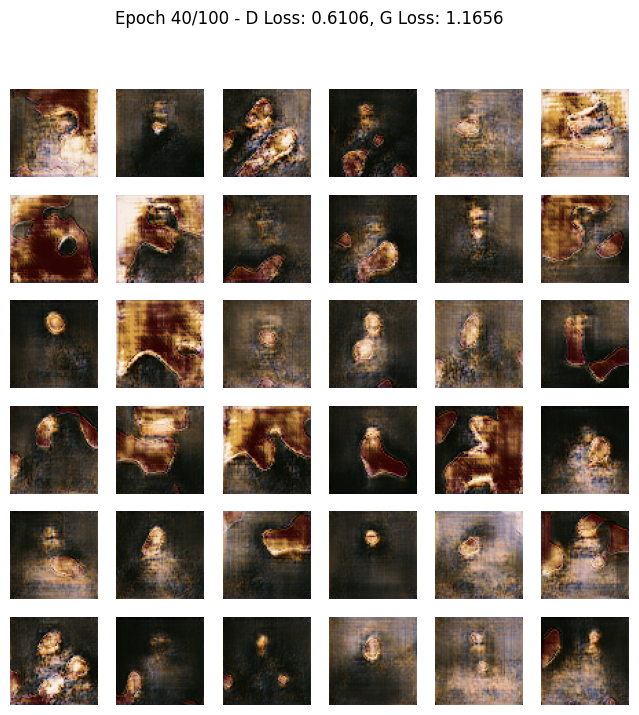

204/204 ━━━━━━━━━━━━━━━━━━━━ 25s 123ms/step - d_loss: 0.6054 - g_loss: 1.1562
Epoch 41/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 39s 115ms/step - d_loss: 0.6129 - g_loss: 1.1212
Epoch 42/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 114ms/step - d_loss: 0.6095 - g_loss: 1.1591
Epoch 43/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 111ms/step - d_loss: 0.5954 - g_loss: 1.3616
Epoch 44/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 113ms/step - d_loss: 0.6089 - g_loss: 1.1372
Epoch 45/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 111ms/step - d_loss: 0.6097 - g_loss: 1.1512
Epoch 46/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 109ms/step - d_loss: 0.6217 - g_loss: 1.1786
Epoch 47/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 112ms/step - d_loss: 0.6144 - g_loss: 1.1077
Epoch 48/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 40s 109ms/step - d_loss: 0.6066 - g_loss: 1.1890
Epoch 49/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 112ms/step - d_loss: 0.6438 - g_loss: 1.1326
Epoch 50/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 112ms/step - d_loss: 0.6010 - g_loss: 1.1494
Epoch 51/100

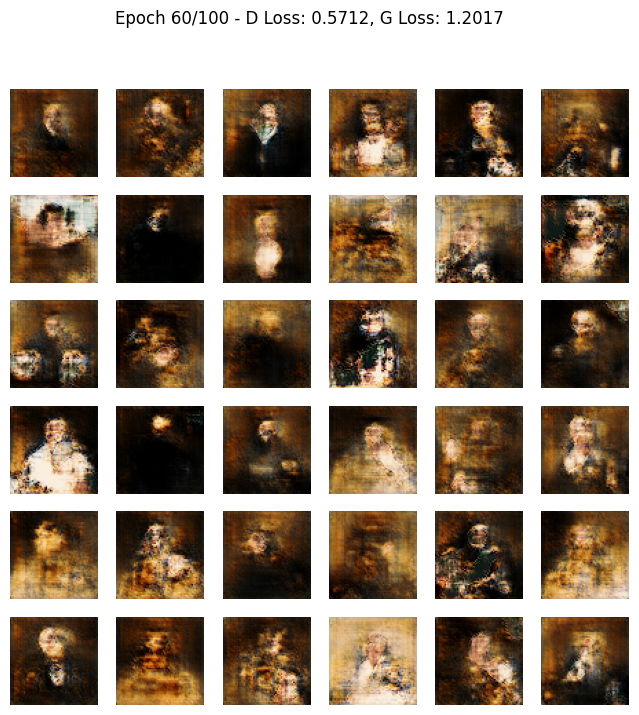

204/204 ━━━━━━━━━━━━━━━━━━━━ 24s 118ms/step - d_loss: 0.5731 - g_loss: 1.1946
Epoch 61/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 40s 112ms/step - d_loss: 0.5830 - g_loss: 1.2580
Epoch 62/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 111ms/step - d_loss: 0.5318 - g_loss: 1.4954
Epoch 63/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 111ms/step - d_loss: 0.6020 - g_loss: 1.3163
Epoch 64/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 113ms/step - d_loss: 0.5809 - g_loss: 1.2463
Epoch 65/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 24s 116ms/step - d_loss: 0.5766 - g_loss: 1.2918
Epoch 66/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 111ms/step - d_loss: 0.6026 - g_loss: 1.2682
Epoch 67/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 113ms/step - d_loss: 0.5770 - g_loss: 1.1947
Epoch 68/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 112ms/step - d_loss: 0.5721 - g_loss: 1.2442
Epoch 69/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 110ms/step - d_loss: 0.5759 - g_loss: 1.1951
Epoch 70/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 113ms/step - d_loss: 0.5734 - g_loss: 1.2883
Epoch 71/100

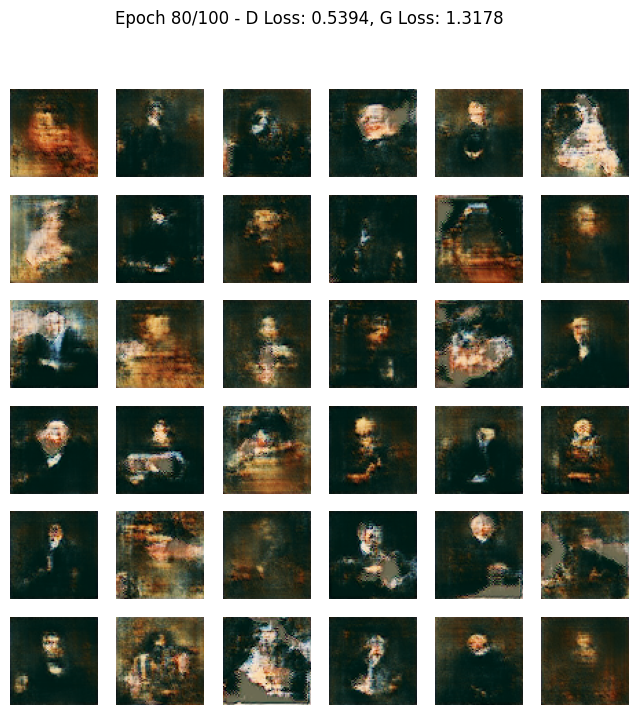

204/204 ━━━━━━━━━━━━━━━━━━━━ 24s 118ms/step - d_loss: 0.5380 - g_loss: 1.3202
Epoch 81/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 112ms/step - d_loss: 0.5573 - g_loss: 1.2796
Epoch 82/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 41s 112ms/step - d_loss: 0.5726 - g_loss: 1.3890
Epoch 83/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 111ms/step - d_loss: 0.5466 - g_loss: 1.2846
Epoch 84/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 41s 112ms/step - d_loss: 0.5562 - g_loss: 1.2890
Epoch 85/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 112ms/step - d_loss: 0.5554 - g_loss: 1.2715
Epoch 86/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 41s 112ms/step - d_loss: 0.5402 - g_loss: 1.3286
Epoch 87/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 22s 110ms/step - d_loss: 0.5379 - g_loss: 1.3246
Epoch 88/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 112ms/step - d_loss: 0.5290 - g_loss: 1.3521
Epoch 89/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 112ms/step - d_loss: 0.5485 - g_loss: 1.3209
Epoch 90/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 23s 113ms/step - d_loss: 0.5320 - g_loss: 1.4169
Epoch 91/100

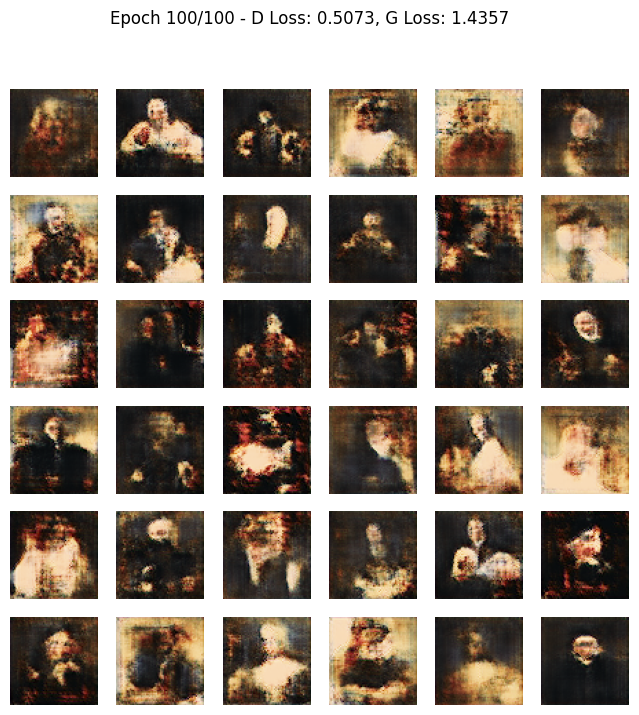

204/204 ━━━━━━━━━━━━━━━━━━━━ 43s 120ms/step - d_loss: 0.5055 - g_loss: 1.4152


In [ ]:
epochs = 100
batch_size = 32
learning_rate = 0.0001
decay_steps = 1000
decay_rate = 0.95
epsilon = 1e-07

d_learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(learning_rate,decay_steps,decay_rate,
                                                              staircase=True)
g_learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate, decay_steps, decay_rate,
                                                                 staircase=True)

model=GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)

model.compile(d_optimizer=tf.keras.optimizers.RMSprop(learning_rate=d_learning_rate,epsilon=epsilon),
            g_optimizer=tf.keras.optimizers.RMSprop(learning_rate=g_learning_rate,epsilon=epsilon),
            loss_fn=tf.keras.losses.BinaryCrossentropy())
image_callback = ImageGeneratorCallback(latent_dim)
history = model.fit(data, epochs=epochs, batch_size=batch_size, callbacks=[image_callback])

In [ ]:
import io
import os
import zipfile


zip_buffer = io.BytesIO()

with zipfile.ZipFile(zip_buffer, 'a', zipfile.ZIP_DEFLATED, False) as zip_file:
    for epoch, generated_images in enumerate(image_callback.generated_images, start=1):
        fig, axs = plt.subplots(6, 6, figsize=(10, 10))
        for i in range(6):
            for j in range(6):
                axs[i, j].imshow(generated_images[i * 6 + j])
                axs[i, j].axis('off')

        plt.suptitle(f"Epoch {epoch}/{epochs}")
        plt.savefig(f"epoch_{epoch}_images.png")
        plt.close(fig)

        zip_file.write(f"epoch_{epoch}_images.png", f"epoch_{epoch}_images.png")
        os.remove(f"epoch_{epoch}_images.png")

with open("generated_images.zip", "wb") as f:
    f.write(zip_buffer.getvalue())


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


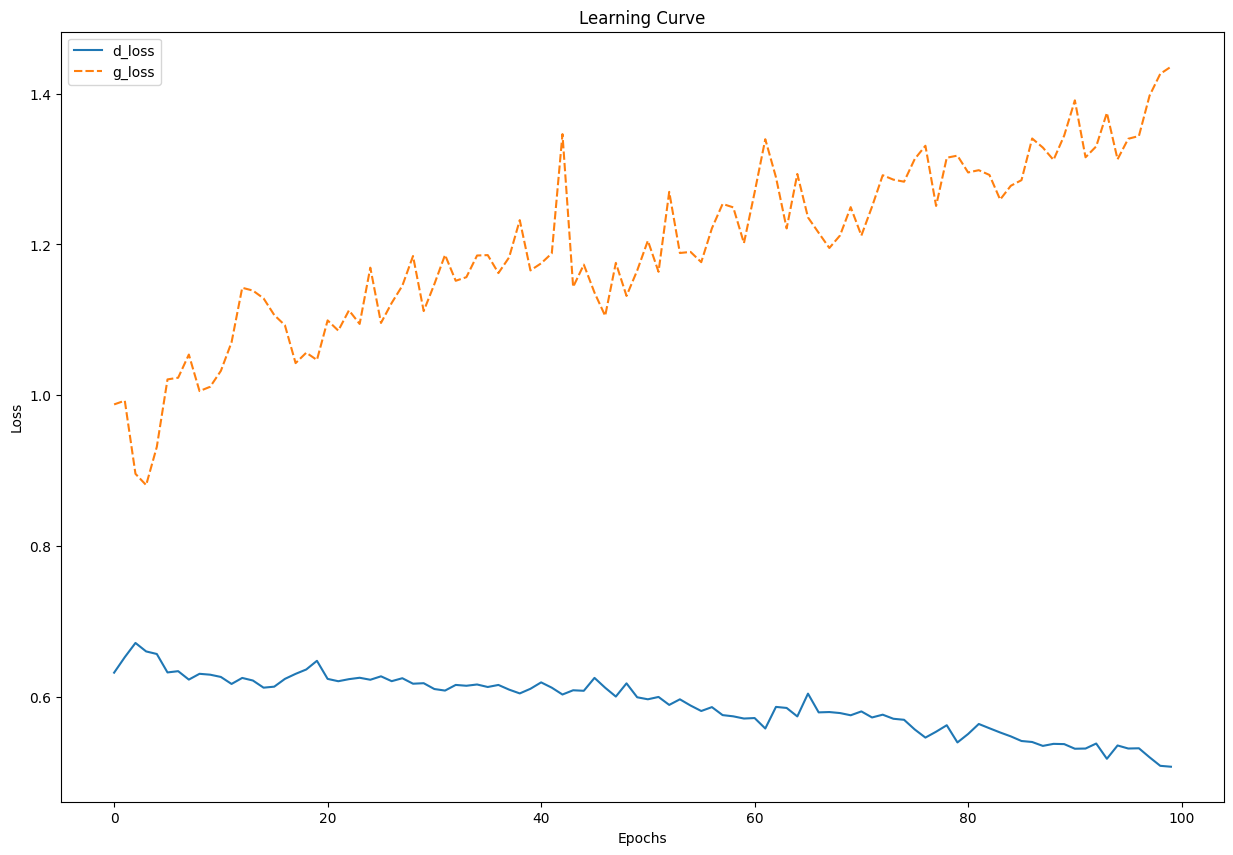

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(15, 10))
ax = sns.lineplot(data=history.history)
ax.set(xlabel="Epochs")
ax.set(ylabel="Loss")
ax.set_title("Learning Curve")
plt.show()

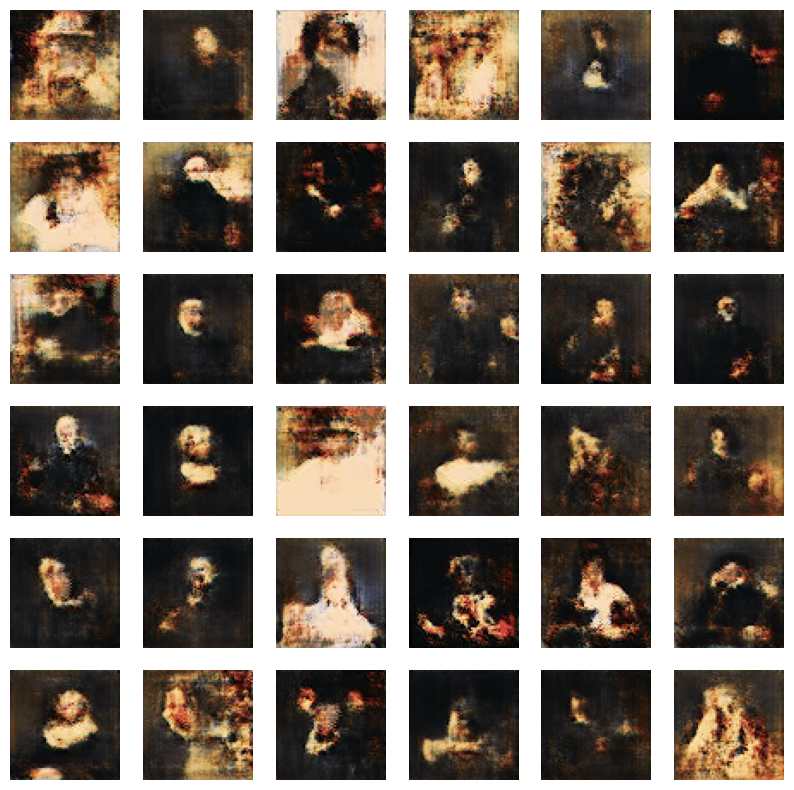

In [ ]:
def generate_and_display_images(generator, num_images, latent_dim):
    generated_images = generator(tf.random.normal([num_images, latent_dim]), training=False)

    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(num_images//6, num_images//6, i+1)
        plt.imshow(generated_images[i], cmap='gray', vmin=0, vmax=1)
        plt.axis('off')
    plt.show()

num_images = 36
generate_and_display_images(generator, num_images, latent_dim)